#Regresión Lineal y Logistica de Titanic


1.Importamos librerías

In [42]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2.Cargamos del dataset

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset_para_trabajar_sklearn/dataset_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3.Cantidad de Filas, valores null y estadisticas del dataset

In [44]:
print(f'Cantidad de Filas: {df.shape[0]}')
print(f'Valore Null: {df.isnull().values.any()}')
df.describe()


Cantidad de Filas: 891
Valore Null: True


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Descripción de las columnas

In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked '],
      dtype='object')

#Normalizar dataset

Eliminar variables innecesarias 

In [46]:
df.drop(['Cabin','Name','Ticket','Embarked '], axis=1,inplace=True)
df.dropna(inplace=True)
df.head()
#df.shape

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


Convertir variables categoricas a númericas

In [47]:
from sklearn import preprocessing    
le =preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])


Volvemos a mostrar los datos con los cambios

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


Convertir float en int 

In [49]:
df['Pclass'] = df['Pclass'].fillna(0).astype(np.int64)
df['Age'] = df['Age'].fillna(0).astype(np.int64)
df['Fare'] = df['Fare'].fillna(0).astype(np.int64)
df['PassengerId'] = df['PassengerId'].fillna(0).astype(np.int64)

Mostrar los cambios

In [50]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22,1,0,7
1,2,1,1,0,38,1,0,71
2,3,1,3,0,26,0,0,7
3,4,1,1,0,35,1,0,53
4,5,0,3,1,35,0,0,8


In [51]:
print(f'Valore Null: {df.isnull().values.any()}')

Valore Null: False


Grafica de asociación de datos 

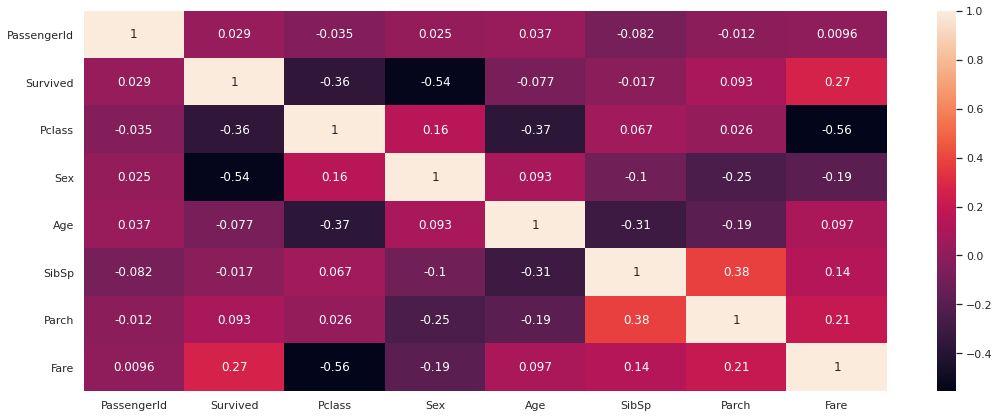

In [52]:
sns.set(rc={'figure.figsize':(18,7)})
sns.heatmap(data=df.corr(), annot=True)

Grafica

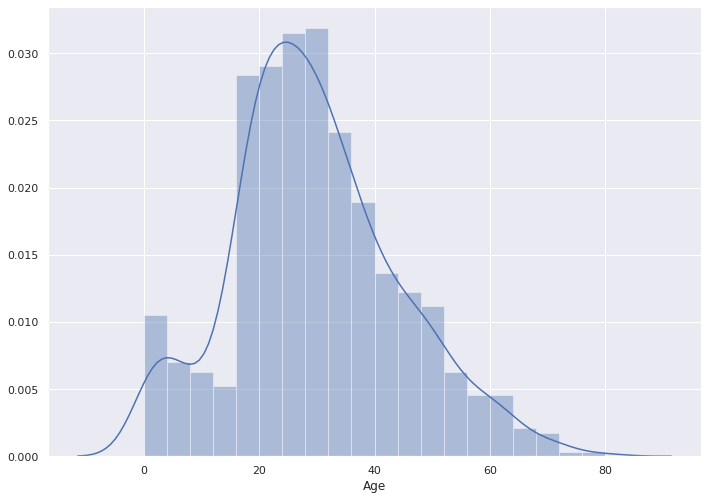

In [54]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Age'])
plt.show()

#Regresion Lineal 

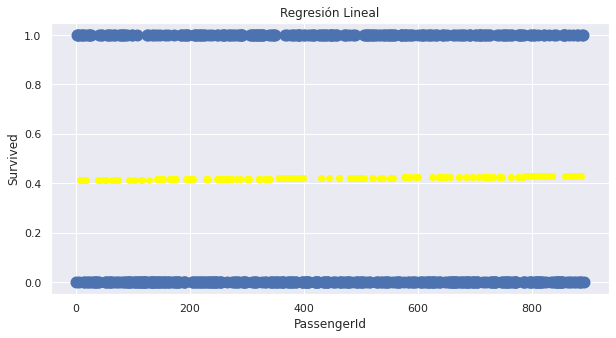


 Presición del modelo
9.34488933477251e-05


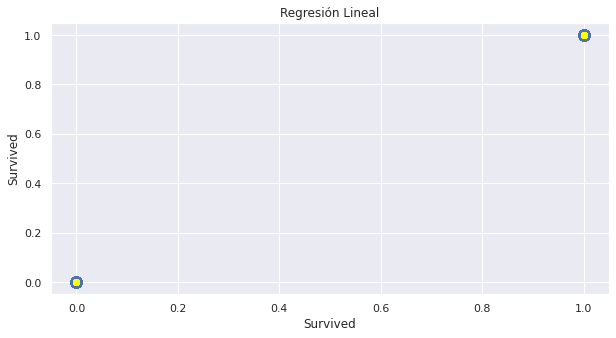


 Presición del modelo
1.0


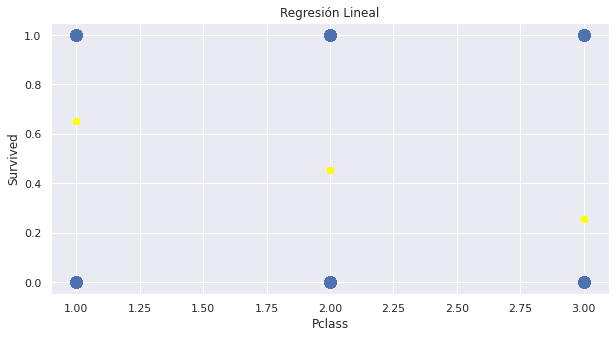


 Presición del modelo
0.1124287570614283


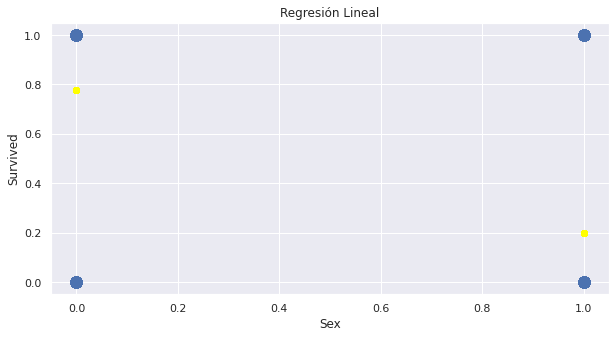


 Presición del modelo
0.31992073526289366


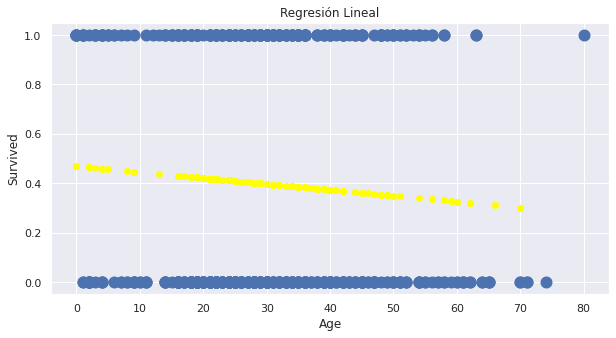


 Presición del modelo
0.005113283753242381


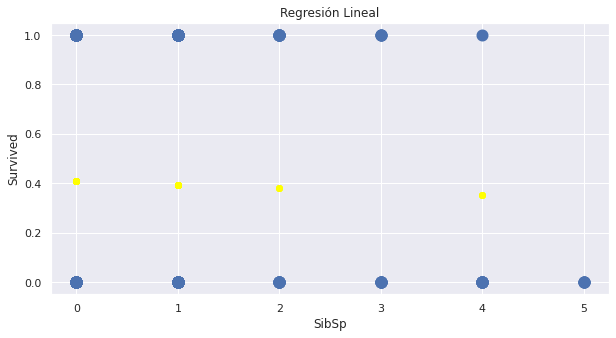


 Presición del modelo
0.0008513978173135817


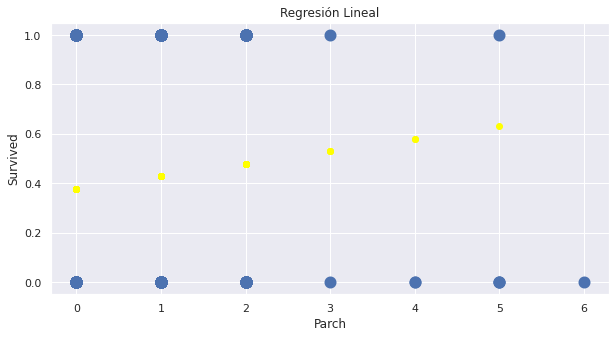


 Presición del modelo
0.007155918996133437


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import LogisticRegression

for col in df.columns[:-1]:
  x= df[[col]]
  y= df['Survived']
  x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
  regressor= LinearRegression()
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)
  sns.set(rc={'figure.figsize':(10,5)})
  plt.scatter(x_train[col],y_train,linewidth=6)
  plt.scatter(x_test[col],y_pred,color='yellow',linewidths=1)
  plt.title('Regresión Lineal')
  plt.xlabel(col)
  plt.ylabel('Survived')
  plt.show()
  print('\n Presición del modelo')
  print(regressor.score(x_train, y_train))

#Regresión Logistica

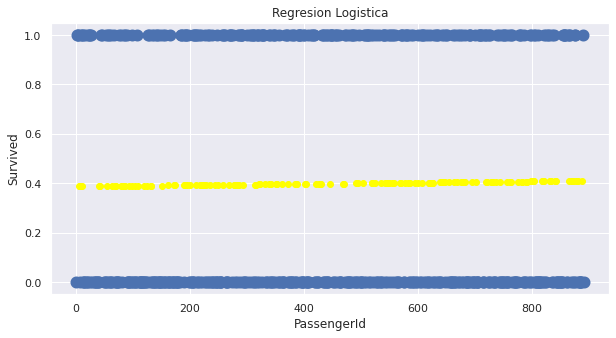

PRESICION DEL MODELO 
0.00018087783177267447


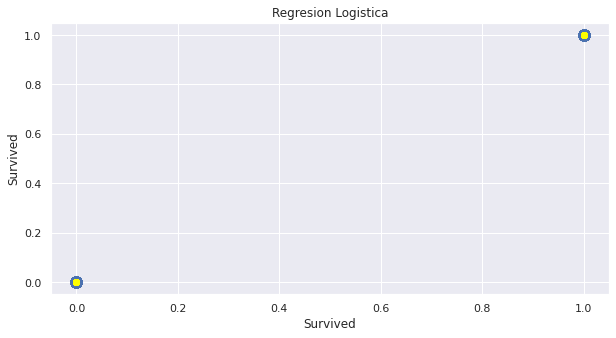

PRESICION DEL MODELO 
1.0


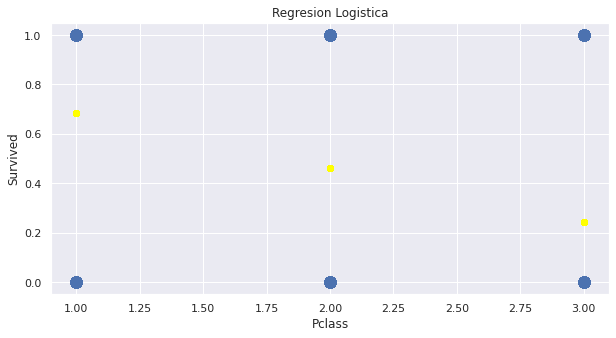

PRESICION DEL MODELO 
0.14163653381728958


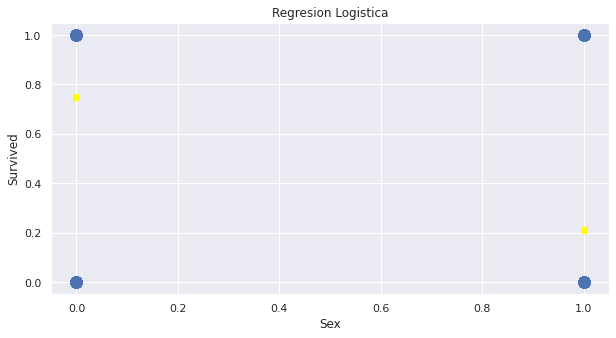

PRESICION DEL MODELO 
0.27961487836335563


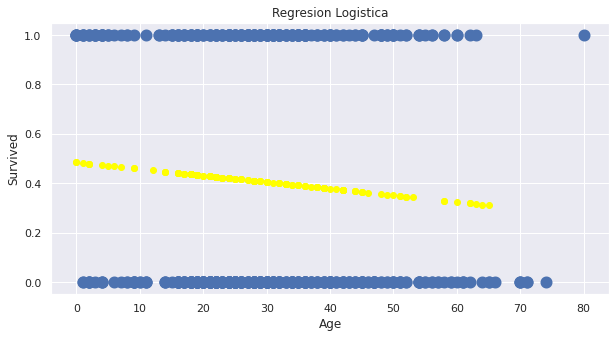

PRESICION DEL MODELO 
0.006277174307020128


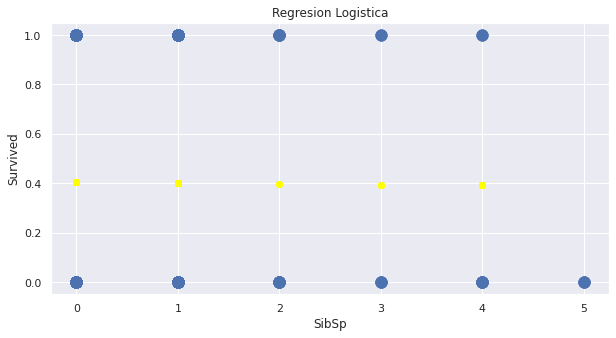

PRESICION DEL MODELO 
3.3089405985564646e-05


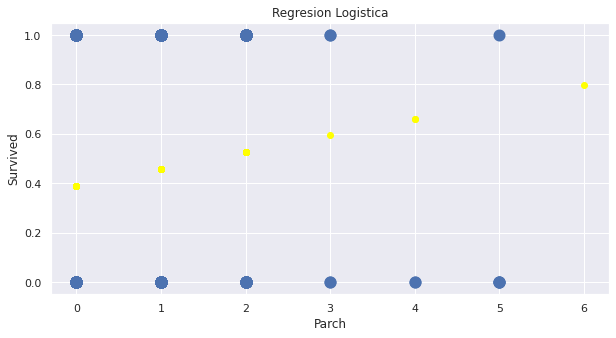

PRESICION DEL MODELO 
0.012900401717226728


In [56]:
for col in  df.columns[:-1]:
  x= df[[col]]
  y= df['Survived']

  x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

  regressor = LinearRegression()
  log_regresor = regressor.fit(x_train,y_train)
  y_pred = log_regresor.predict(x_test)

  sns.set(rc={'figure.figsize':(10,5)})

  plt.scatter(x_train[col],y_train,linewidth=6)
  plt.scatter(x_test[col],y_pred,color='yellow',linewidths=1)
  plt.title('Regresion Logistica')
  plt.xlabel(col)
  plt.ylabel('Survived')
  plt.show()

  print('PRESICION DEL MODELO ')
  print(regressor.score(x_train,y_train))